In [757]:
# Importar librerías 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [758]:
data_folder = 'data/'

In [759]:
# Cargar los archivos CSV
booking_df = pd.read_csv(data_folder + 'booking.csv')
propiedades_df = pd.read_csv(data_folder + 'propiedades.csv')

Limpieza y EDA del primer dataset

In [760]:
booking_df.head()

,PropertyId,Property_BookingId,BookingCreatedDate,ArrivalDate,DepartureDate,Adults,Children,Infants,Persons,NumNights,Channel,RoomRate,CleaningFee,Revenue,ADR,TouristTax,TotalPaid
0,43469,155168,2024-10-03 16:42:13,2024-10-09 00:00:00,2024-10-12 00:00:00,2,0,0,2,3,Airbnb,391.03,0.00,391.03,130.34,3.96,394.99
1,43025,155167,03/10/2024,2025-02-02 00:00:00,2025-02-07 00:00:00,3,0,0,3,5,Booking.com,1692.00,101.13,1793.13,358.63,15.00,1808.13
2,43404,155166,03/10/2024,2024-11-18 00:00:00,2024-11-25 00:00:00,3,0,0,3,7,Airbnb,827.17,0.00,827.17,118.17,144.38,971.55
3,43276,155165,2024-10-03 15:55:39,2024-11-14 00:00:00,2024-11-18 00:00:00,5,0,0,5,4,Airbnb,692.86,0.00,692.86,173.22,137.50,830.36
4,4138,155164,2024-10-03 15:53:02,2024-11-20 00:00:00,2024-12-06 00:00:00,5,0,0,5,16,Airbnb,2005.43,0.00,2005.43,125.34,240.63,2246.06


In [761]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79595 entries, 0 to 79594
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PropertyId          79595 non-null  int64  
 1   Property_BookingId  79595 non-null  int64  
 2   BookingCreatedDate  79595 non-null  object 
 3   ArrivalDate         79595 non-null  object 
 4   DepartureDate       79595 non-null  object 
 5   Adults              79595 non-null  int64  
 6   Children            79595 non-null  int64  
 7   Infants             79595 non-null  int64  
 8   Persons             79595 non-null  int64  
 9   NumNights           79595 non-null  int64  
 10  Channel             79162 non-null  object 
 11  RoomRate            71635 non-null  float64
 12  CleaningFee         79595 non-null  float64
 13  Revenue             71635 non-null  float64
 14  ADR                 79121 non-null  float64
 15  TouristTax          79420 non-null  float64
 16  Tota

In [762]:
booking_df.describe()


,PropertyId,Property_BookingId,Adults,Children,Infants,Persons,NumNights,RoomRate,CleaningFee,Revenue,ADR,TouristTax,TotalPaid
count,79595.000000,79595.000000,79595.000000,79595.000000,79595.000000,79595.000000,79595.000000,71635.000000,79595.000000,71635.000000,79121.000000,79420.000000,79595.000000
mean,32905.939092,109414.660016,3.596934,0.416044,0.028595,4.041573,5.378566,953.378157,56.516353,1009.920357,212.989302,61.978410,1075.912741
std,16619.359274,27978.782124,1.761671,0.885849,0.180560,1.831116,10.859763,839.469840,51.905713,852.887444,119.009103,51.020113,904.098250
min,2883.000000,48745.000000,0.000000,0.000000,0.000000,0.000000,-29.000000,-179.900000,0.000000,0.000000,0.000000,-116.640000,-600.000000
25%,12688.000000,87699.500000,2.000000,0.000000,0.000000,3.000000,3.000000,470.700000,0.000000,516.350000,135.340000,24.200000,554.880000
50%,43038.000000,111050.000000,3.000000,0.000000,0.000000,4.000000,4.000000,756.000000,66.550000,811.300000,191.840000,49.500000,871.370000
75%,43187.000000,133282.500000,4.000000,0.000000,0.000000,5.000000,6.000000,1198.800000,96.050000,1266.785000,265.820000,84.700000,1352.880000
max,43630.000000,155168.000000,12.000000,9.000000,4.000000,15.000000,925.000000,32300.000000,327.000000,32300.000000,9009.500000,465.850000,36150.000000


In [763]:
# Buscar duplicados
duplicados_booking = booking_df.duplicated().sum()
duplicados_booking

np.int64(0)

In [764]:
# Buscar nulos
faltantes_booking= booking_df.isnull().sum()
faltantes_booking

PropertyId               0
Property_BookingId       0
BookingCreatedDate       0
ArrivalDate              0
DepartureDate            0
Adults                   0
Children                 0
Infants                  0
Persons                  0
NumNights                0
Channel                433
RoomRate              7960
CleaningFee              0
Revenue               7960
ADR                    474
TouristTax             175
TotalPaid                0
dtype: int64

Transformación y estandarizaciónm de columnas de fechas a formato datetime para facilitar cálculos posteriores. 

In [765]:
# La columna BookingCreatedDate presenta diferentes formatos de fecha por lo que debemos proceder por partes.

# 1. Detectar las filas que tienen fechas en formato 'dd/mm/yyyy'
mask_ddmmyyyy = booking_df['BookingCreatedDate'].str.len() == 10

# 2. Convertir las fechas en formato 'dd/mm/yyyy'
booking_df.loc[mask_ddmmyyyy, 'BookingCreatedDate'] = pd.to_datetime(
    booking_df.loc[mask_ddmmyyyy, 'BookingCreatedDate'], format='%d/%m/%Y', errors='coerce')

# 3. Convertir las fechas que ya están en formato 'yyyy-mm-dd HH:MM:SS'
booking_df.loc[~mask_ddmmyyyy, 'BookingCreatedDate'] = pd.to_datetime(
    booking_df.loc[~mask_ddmmyyyy, 'BookingCreatedDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# 4. Asegurarse de que la columna sea de tipo datetime
booking_df['BookingCreatedDate'] = pd.to_datetime(booking_df['BookingCreatedDate'], errors='coerce')

# 5. Eliminar la hora y quedarnos solo con la fecha en tipo datetime
booking_df['BookingCreatedDate'] = pd.to_datetime(booking_df['BookingCreatedDate'].dt.date)

# 6. Verificar el resultado
print(booking_df['BookingCreatedDate'].head(10))
print(booking_df['BookingCreatedDate'].dtypes)  # Para verificar el tipo de dato


0   2024-10-03
1   2024-10-03
2   2024-10-03
3   2024-10-03
4   2024-10-03
5   2024-10-03
6   2024-10-03
7   2024-10-03
8   2024-10-03
9   2024-10-03
Name: BookingCreatedDate, dtype: datetime64[ns]
datetime64[ns]


In [766]:
# Convertir todas las fechas de 'ArrivalDate' a formato datetime
booking_df['ArrivalDate'] = pd.to_datetime(booking_df['ArrivalDate'], format='%Y-%m-%d %H:%M:%S')

# Verificar el resultado
print(booking_df['ArrivalDate'].head(10))

0   2024-10-09
1   2025-02-02
2   2024-11-18
3   2024-11-14
4   2024-11-20
5   2024-12-08
6   2024-10-31
7   2024-10-07
8   2024-11-05
9   2024-11-08
Name: ArrivalDate, dtype: datetime64[ns]


In [767]:
print(booking_df['DepartureDate'].head(10))

0    2024-10-12 00:00:00
1    2025-02-07 00:00:00
2    2024-11-25 00:00:00
3    2024-11-18 00:00:00
4    2024-12-06 00:00:00
5    2024-12-15 00:00:00
6    2024-11-03 00:00:00
7    2024-10-09 00:00:00
8    2024-11-09 00:00:00
9    2024-11-11 00:00:00
Name: DepartureDate, dtype: object


In [768]:
# Convertir todas las fechas de 'DepartureDate' a formato datetime
booking_df['DepartureDate'] = pd.to_datetime(booking_df['DepartureDate'], format='%Y-%m-%d %H:%M:%S')

# Verificar el resultado
print(booking_df['DepartureDate'].head(10))

0   2024-10-12
1   2025-02-07
2   2024-11-25
3   2024-11-18
4   2024-12-06
5   2024-12-15
6   2024-11-03
7   2024-10-09
8   2024-11-09
9   2024-11-11
Name: DepartureDate, dtype: datetime64[ns]


In [769]:
# Verificar cambios
booking_df.head()

,PropertyId,Property_BookingId,BookingCreatedDate,ArrivalDate,DepartureDate,Adults,Children,Infants,Persons,NumNights,Channel,RoomRate,CleaningFee,Revenue,ADR,TouristTax,TotalPaid
0,43469,155168,2024-10-03,2024-10-09,2024-10-12,2,0,0,2,3,Airbnb,391.03,0.00,391.03,130.34,3.96,394.99
1,43025,155167,2024-10-03,2025-02-02,2025-02-07,3,0,0,3,5,Booking.com,1692.00,101.13,1793.13,358.63,15.00,1808.13
2,43404,155166,2024-10-03,2024-11-18,2024-11-25,3,0,0,3,7,Airbnb,827.17,0.00,827.17,118.17,144.38,971.55
3,43276,155165,2024-10-03,2024-11-14,2024-11-18,5,0,0,5,4,Airbnb,692.86,0.00,692.86,173.22,137.50,830.36
4,4138,155164,2024-10-03,2024-11-20,2024-12-06,5,0,0,5,16,Airbnb,2005.43,0.00,2005.43,125.34,240.63,2246.06


Manejo de valores nulos en las columnas: Channel, RoomRate, Revenue, ADR, TouristTx.

In [770]:
faltantes_booking= booking_df.isnull().sum()
faltantes_booking

PropertyId               0
Property_BookingId       0
BookingCreatedDate       0
ArrivalDate              0
DepartureDate            0
Adults                   0
Children                 0
Infants                  0
Persons                  0
NumNights                0
Channel                433
RoomRate              7960
CleaningFee              0
Revenue               7960
ADR                    474
TouristTax             175
TotalPaid                0
dtype: int64

In [771]:
# Reemplazar valores nulos en la columna 'Channel' por 'Unknown'
booking_df['Channel'].fillna('Unknown', inplace=True)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14096\2909659942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  booking_df['Channel'].fillna('Unknown', inplace=True)


In [772]:
faltantes_booking= booking_df.isnull().sum()
faltantes_booking

PropertyId               0
Property_BookingId       0
BookingCreatedDate       0
ArrivalDate              0
DepartureDate            0
Adults                   0
Children                 0
Infants                  0
Persons                  0
NumNights                0
Channel                  0
RoomRate              7960
CleaningFee              0
Revenue               7960
ADR                    474
TouristTax             175
TotalPaid                0
dtype: int64

In [773]:
# Imputar valores en el resto de columnas, tomando la media como valor a imputar. 

booking_df['RoomRate'].fillna(booking_df['RoomRate'].median(), inplace=True)
booking_df['Revenue'].fillna(booking_df['Revenue'].median(), inplace=True)
booking_df['ADR'].fillna(booking_df['ADR'].median(), inplace=True)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14096\1116392499.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  booking_df['RoomRate'].fillna(booking_df['RoomRate'].median(), inplace=True)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14096\1116392499.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [774]:
# Reemplazar nulos de la columna 'TouristTax' por el valor 0.
booking_df['TouristTax'].fillna(0, inplace=True)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14096\2780688131.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  booking_df['TouristTax'].fillna(0, inplace=True)


In [775]:
# Verficar que ya no hay nulos
faltantes_booking= booking_df.isnull().sum()
faltantes_booking

PropertyId            0
Property_BookingId    0
BookingCreatedDate    0
ArrivalDate           0
DepartureDate         0
Adults                0
Children              0
Infants               0
Persons               0
NumNights             0
Channel               0
RoomRate              0
CleaningFee           0
Revenue               0
ADR                   0
TouristTax            0
TotalPaid             0
dtype: int64

Verificar coherencia  de la columna Persons

In [776]:
# La columna 'Persons' debe ser la suma de 'Adults', 'Children', 'Infants' para que sea coherente. 
booking_df['CalculatedPersons'] = booking_df['Adults'] + booking_df['Children'] + booking_df['Infants']
booking_df['Persons_check'] = booking_df['Persons'] == booking_df['CalculatedPersons']
# Filtrar las filas donde la suma no coincide
inconsistencias = booking_df[booking_df['Persons_check'] == False]

# Imprimir las inconsistencias si hay alguna
if not inconsistencias.empty:
    print(inconsistencias)
else:
    print("No se encontraron inconsistencias.")

No se encontraron inconsistencias.


Eliminar las columna CalculatedPersons y Persons_check que creamos antes para verificar la consistencia de la variable Persons

In [777]:
booking_df.drop(columns=['CalculatedPersons', 'Persons_check'], inplace=True)

In [778]:
# Verificar resultados
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79595 entries, 0 to 79594
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PropertyId          79595 non-null  int64         
 1   Property_BookingId  79595 non-null  int64         
 2   BookingCreatedDate  79595 non-null  datetime64[ns]
 3   ArrivalDate         79595 non-null  datetime64[ns]
 4   DepartureDate       79595 non-null  datetime64[ns]
 5   Adults              79595 non-null  int64         
 6   Children            79595 non-null  int64         
 7   Infants             79595 non-null  int64         
 8   Persons             79595 non-null  int64         
 9   NumNights           79595 non-null  int64         
 10  Channel             79595 non-null  object        
 11  RoomRate            79595 non-null  float64       
 12  CleaningFee         79595 non-null  float64       
 13  Revenue             79595 non-null  float64   

Aunque no encontramos valores duplicados en la revisión inicial, nos aseguramos que no haya duplicados después de las transformaciones realizadas.

In [779]:
booking_df.drop_duplicates(inplace=True)

Revisamos los tipos de datos de las variables.

In [780]:
print(booking_df.dtypes)

PropertyId                     int64
Property_BookingId             int64
BookingCreatedDate    datetime64[ns]
ArrivalDate           datetime64[ns]
DepartureDate         datetime64[ns]
Adults                         int64
Children                       int64
Infants                        int64
Persons                        int64
NumNights                      int64
Channel                       object
RoomRate                     float64
CleaningFee                  float64
Revenue                      float64
ADR                          float64
TouristTax                   float64
TotalPaid                    float64
dtype: object


Detección y tratamiento de outliers. 

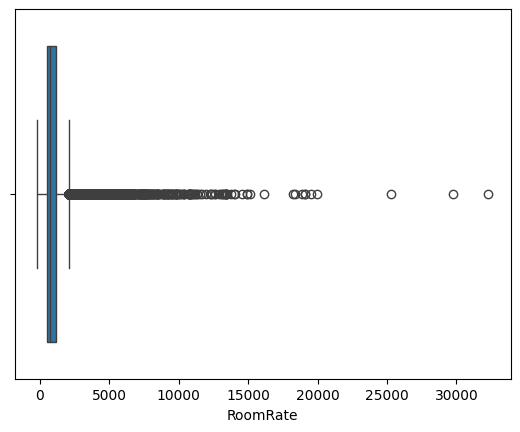

In [781]:
# Outliers en RoomRate
sns.boxplot(x=booking_df['RoomRate'])
plt.show()

In [782]:
# Calcular los percentiles 1 y 99
lower_bound = booking_df['RoomRate'].quantile(0.01)
upper_bound = booking_df['RoomRate'].quantile(0.99)

# Filtrar el DataFrame para mantener solo los valores entre los percentiles 1 y 99
booking_df = booking_df[(booking_df['RoomRate'] > lower_bound) & (booking_df['RoomRate'] < upper_bound)]

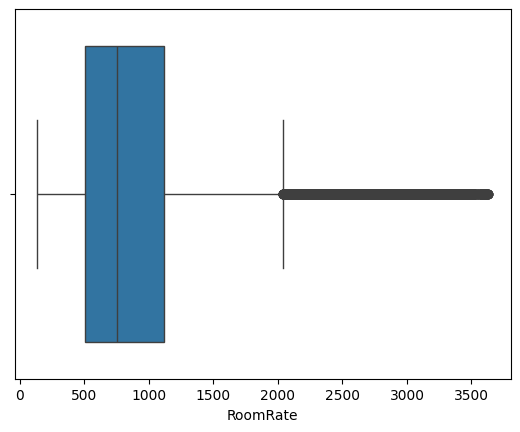

In [783]:
# Mostrar cambios después de eliminación de outliers
sns.boxplot(x=booking_df['RoomRate'])
plt.show()

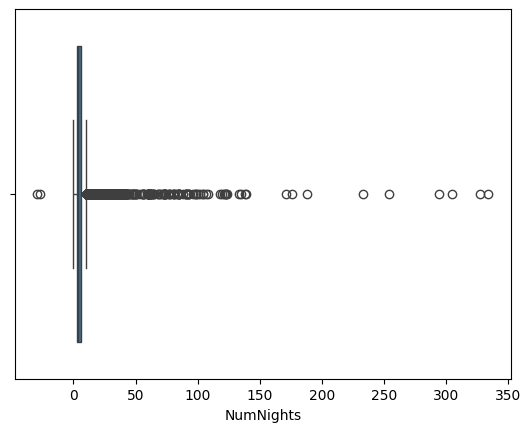

In [784]:
# Outliers en NumNights
sns.boxplot(x=booking_df['NumNights'])
plt.show()

In [785]:
# Calcular los percentiles 1 y 99
lower_bound = booking_df['NumNights'].quantile(0.01)
upper_bound = booking_df['NumNights'].quantile(0.99)

# Filtrar el DataFrame para mantener solo los valores entre los percentiles 1 y 99
booking_df = booking_df[(booking_df['NumNights'] > lower_bound) & (booking_df['NumNights'] < upper_bound)]

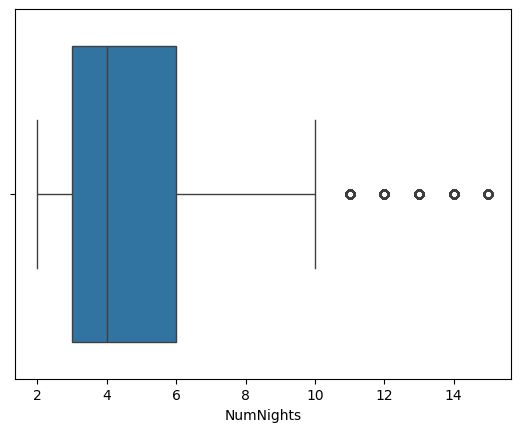

In [786]:
# Mostrar cambios después de eliminación de outliers
sns.boxplot(x=booking_df['NumNights'])
plt.show()

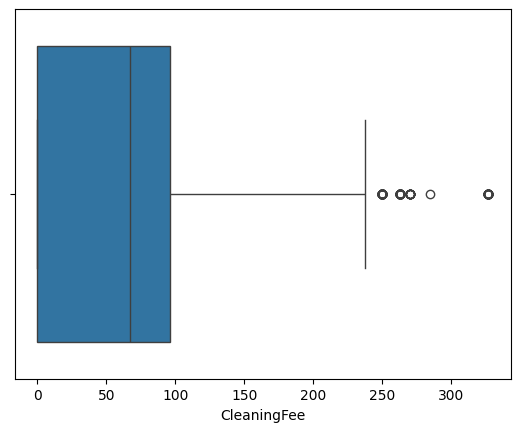

In [787]:
# Outliers en CleaningFee
sns.boxplot(x=booking_df['CleaningFee'])
plt.show()

In [788]:
# Calcular los percentiles 1 y 99
lower_bound = booking_df['CleaningFee'].quantile(0.01)
upper_bound = booking_df['CleaningFee'].quantile(0.99)

# Filtrar el DataFrame para mantener solo los valores entre los percentiles 1 y 99
booking_df = booking_df[(booking_df['CleaningFee'] > lower_bound) & (booking_df['CleaningFee'] < upper_bound)]

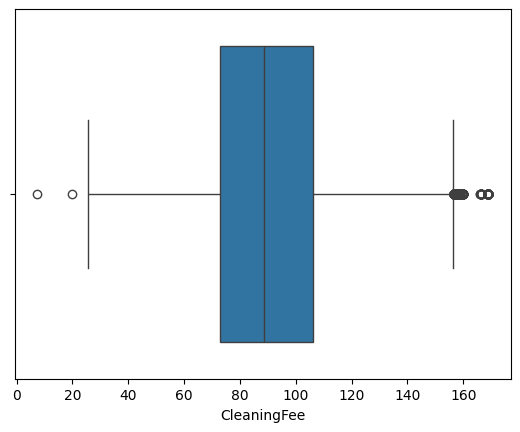

In [789]:
# Mostrar cambios después de eliminación de outliers
sns.boxplot(x=booking_df['CleaningFee'])
plt.show()

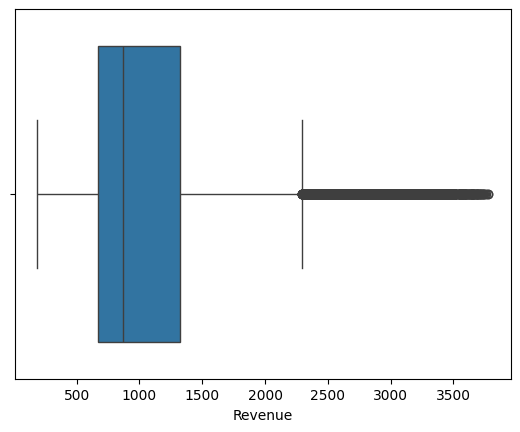

In [790]:
# Outliers en Revenue
sns.boxplot(x=booking_df['Revenue'])
plt.show()

In [791]:
# Calcular los percentiles 1 y 99
lower_bound = booking_df['Revenue'].quantile(0.01)
upper_bound = booking_df['Revenue'].quantile(0.99)

# Filtrar el DataFrame para mantener solo los valores entre los percentiles 1 y 99
booking_df = booking_df[(booking_df['Revenue'] > lower_bound) & (booking_df['Revenue'] < upper_bound)]

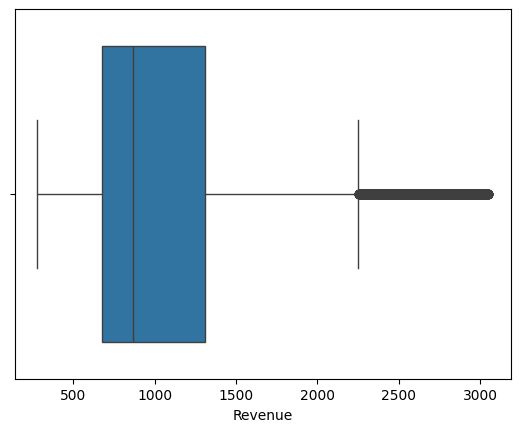

In [792]:
# Mostrar cambios después de eliminación de outliers
sns.boxplot(x=booking_df['Revenue'])
plt.show()

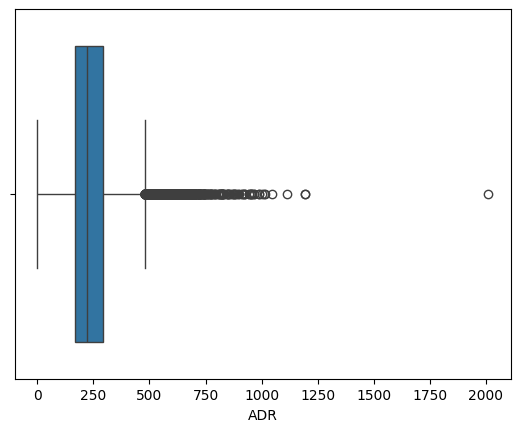

In [793]:
# Outliers en ADR
sns.boxplot(x=booking_df['ADR'])
plt.show()

In [794]:
# Calcular los percentiles 1 y 99
lower_bound = booking_df['ADR'].quantile(0.01)
upper_bound = booking_df['ADR'].quantile(0.99)

# Filtrar el DataFrame para mantener solo los valores entre los percentiles 1 y 99
booking_df = booking_df[(booking_df['ADR'] > lower_bound) & (booking_df['ADR'] < upper_bound)]

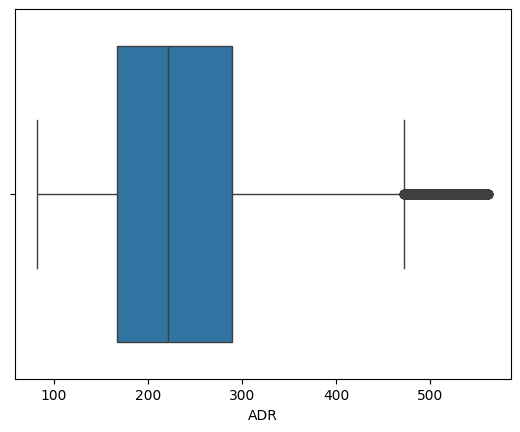

In [795]:
# Outliers en ADR
sns.boxplot(x=booking_df['ADR'])
plt.show()

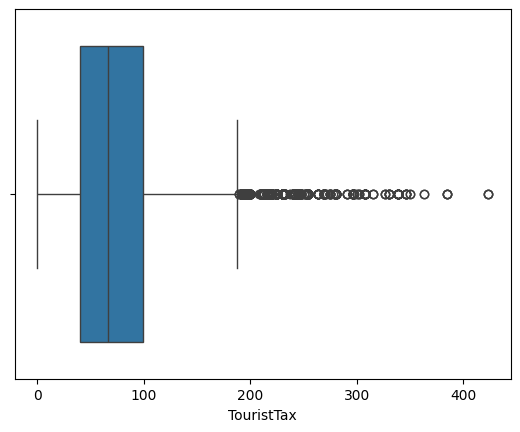

In [796]:
# Outliers en TouristTax
sns.boxplot(x=booking_df['TouristTax'])
plt.show()

In [797]:
# Calcular los percentiles 1 y 99
lower_bound = booking_df['TouristTax'].quantile(0.01)
upper_bound = booking_df['TouristTax'].quantile(0.99)

# Filtrar el DataFrame para mantener solo los valores entre los percentiles 1 y 99
booking_df = booking_df[(booking_df['TouristTax'] > lower_bound) & (booking_df['TouristTax'] < upper_bound)]

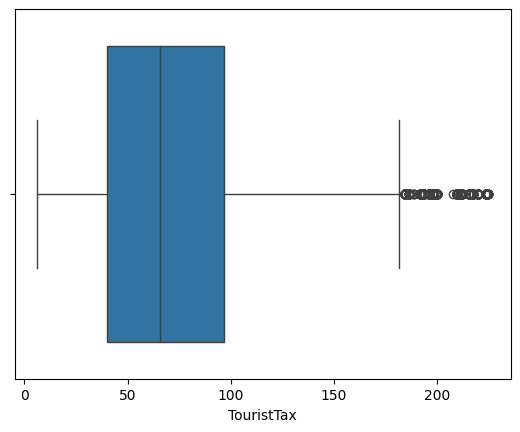

In [798]:
# Outliers en TouristTax
sns.boxplot(x=booking_df['TouristTax'])
plt.show()

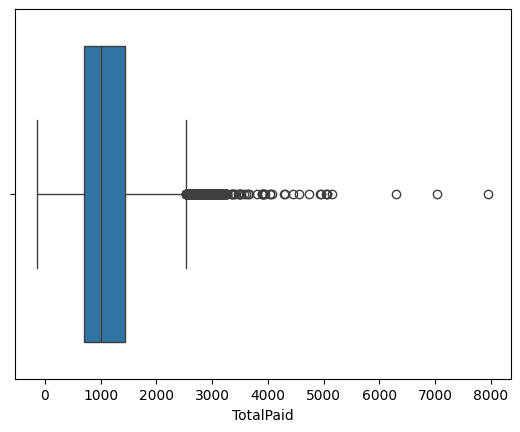

In [799]:
# Outliers en TotalPaid
sns.boxplot(x=booking_df['TotalPaid'])
plt.show()

In [800]:
# Calcular los percentiles 1 y 99
lower_bound = booking_df['TotalPaid'].quantile(0.01)
upper_bound = booking_df['TotalPaid'].quantile(0.99)

# Filtrar el DataFrame para mantener solo los valores entre los percentiles 1 y 99
booking_df = booking_df[(booking_df['TotalPaid'] > lower_bound) & (booking_df['TotalPaid'] < upper_bound)]

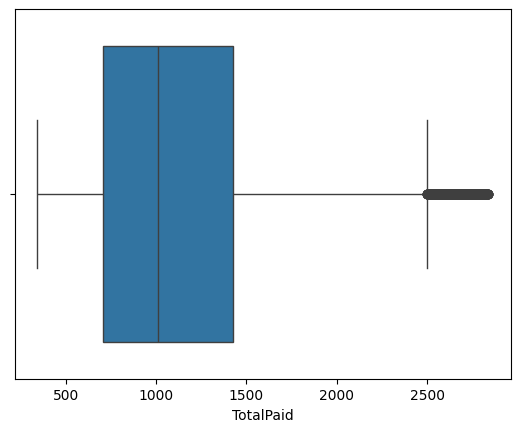

In [801]:
# Outliers en TotalPaid
sns.boxplot(x=booking_df['TotalPaid'])
plt.show()

Limpieza y EDA del segundo dataset

In [802]:
propiedades_df.head() 

,PropertyId,RealProperty,Capacity,Square,PropertyType,NumBedrooms,ReadyDate
0,43630,Yes,7,141,Apartment,3,2024-09-25 00:00:00
1,43622,Yes,4,70,Apartment,2,2024-08-12 00:00:00
2,43620,Yes,2,55,Apartment,1,2024-08-04 00:00:00
3,43616,No,4,60,Apartment,2,2024-07-05 00:00:00
4,43606,Yes,4,60,Apartment,2,2024-06-27 00:00:00


In [803]:
propiedades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PropertyId    344 non-null    int64 
 1   RealProperty  344 non-null    object
 2   Capacity      344 non-null    int64 
 3   Square        344 non-null    int64 
 4   PropertyType  310 non-null    object
 5   NumBedrooms   344 non-null    int64 
 6   ReadyDate     344 non-null    object
dtypes: int64(4), object(3)
memory usage: 18.9+ KB


In [804]:
propiedades_df.describe()

,PropertyId,Capacity,Square,NumBedrooms
count,344.000000,344.000000,344.000000,344.000000
mean,40120.491279,4.811047,70.255814,2.133721
std,10300.292422,2.138579,41.473497,1.157872
min,2883.000000,1.000000,0.000000,0.000000
25%,43052.750000,4.000000,50.000000,1.000000
50%,43231.500000,4.000000,66.000000,2.000000
75%,43445.000000,6.000000,80.000000,3.000000
max,43630.000000,12.000000,523.000000,5.000000


In [805]:
 # Verificar duplicados
duplicados_propiedades= propiedades_df.duplicated().sum()
duplicados_propiedades

np.int64(0)

In [806]:
# Verificar valores nulos
faltantes_propiedades= propiedades_df.isnull().sum()
faltantes_propiedades

PropertyId       0
RealProperty     0
Capacity         0
Square           0
PropertyType    34
NumBedrooms      0
ReadyDate        0
dtype: int64

In [807]:
# Reemplazar valores faltantes de la columna PropertyType por valores Unknown
propiedades_df['PropertyType'].fillna('Unknown', inplace=True)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14096\1144948147.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  propiedades_df['PropertyType'].fillna('Unknown', inplace=True)


In [808]:
# Verificar resultados de cambios
faltantes_propiedades= propiedades_df.isnull().sum()
faltantes_propiedades

PropertyId      0
RealProperty    0
Capacity        0
Square          0
PropertyType    0
NumBedrooms     0
ReadyDate       0
dtype: int64

Cambiamos el tipo de dato object a datetime de la columna 'ReadyDate'

In [809]:
propiedades_df['ReadyDate'] = pd.to_datetime(propiedades_df['ReadyDate'], errors='coerce')

In [810]:
# Mostrar resultados
propiedades_df['ReadyDate'].head(10)

0   2024-09-25
1   2024-08-12
2   2024-08-04
3   2024-07-05
4   2024-06-27
5   2024-09-19
6   2024-07-27
7   2024-07-09
8   2024-05-18
9   2024-05-25
Name: ReadyDate, dtype: datetime64[ns]

Buscamos valores incongruentes en las variables Capacity y Square. Si hay valores que no tienen sentido (por ejemplo, capacidad o tamaño negativos), los eliminaremos.

In [811]:
propiedades_df = propiedades_df[(propiedades_df['Capacity'] > 0) & (propiedades_df['Square'] > 0)]

In [812]:
# Verificar valores únicos en búsqueda de incongruencias
propiedades_df['Capacity'].unique()

array([ 7,  4,  2, 10,  3,  6,  8,  5,  9, 11, 12])

In [813]:
# Verificar valores únicos en búsqueda de incongruencias
propiedades_df['Square'].unique()

array([141,  70,  55,  60, 105,  66,  92,  51,  53,  28,  40,  64,  25,
        95,  99,  68,  67,  50, 102,  45,  57,  44,  31,  84,  38,  65,
       160,  90,  35, 150,  80, 103, 100, 130, 120, 106,  72,  61, 108,
        85,  75,  54,  47,  62,  96, 140, 523, 194, 329, 110,  41,  89,
        77,  78, 101,  69,  82, 124, 113, 111,  71,  32,  58,  83, 145,
       116, 148, 127, 119,  73, 144,  74, 163,  59,  49, 122,  24,  81,
        22,  20,  30])

In [814]:
# Resumen estadístico para detectar valores posibles atípicos
print(propiedades_df[['Capacity', 'NumBedrooms']].describe())

         Capacity  NumBedrooms
count  334.000000   334.000000
mean     4.907186     2.188623
std      2.079590     1.119197
min      2.000000     0.000000
25%      4.000000     1.000000
50%      4.000000     2.000000
75%      6.000000     3.000000
max     12.000000     5.000000


In [815]:
# Filtrar los valores de la columna 'NumBedrooms' que sean mayores a 0. 
propiedades_df = propiedades_df[propiedades_df['NumBedrooms'] > 0]

In [816]:
# Verificar posibles valores incongruentes
propiedades_df['PropertyType'].unique()

array(['Apartment', 'Apa', 'Unknown', 'House'], dtype=object)

In [817]:
# Reemplazar los valores 'Apa' por 'Apartment', ya que hacen referencia a lo mismo.
propiedades_df['PropertyType'] = propiedades_df['PropertyType'].replace('Apa', 'Apartment')

In [818]:
# Verificar cambios
propiedades_df['PropertyType'].unique()

array(['Apartment', 'Unknown', 'House'], dtype=object)

In [819]:
# Verificar cambios contando cuántos valores en 'NumBedrooms' son iguales a 0
num_bedrooms_zero = (propiedades_df['NumBedrooms'] == 0).sum()

# Imprimir el resultado
print(f"El número de propiedades con 0 dormitorios es: {num_bedrooms_zero}")

El número de propiedades con 0 dormitorios es: 0


Observamos las estructuras de los datasets finales

In [820]:
propiedades_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 0 to 343
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   PropertyId    313 non-null    int64         
 1   RealProperty  313 non-null    object        
 2   Capacity      313 non-null    int64         
 3   Square        313 non-null    int64         
 4   PropertyType  313 non-null    object        
 5   NumBedrooms   313 non-null    int64         
 6   ReadyDate     313 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 19.6+ KB


In [821]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41588 entries, 1 to 68655
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PropertyId          41588 non-null  int64         
 1   Property_BookingId  41588 non-null  int64         
 2   BookingCreatedDate  41588 non-null  datetime64[ns]
 3   ArrivalDate         41588 non-null  datetime64[ns]
 4   DepartureDate       41588 non-null  datetime64[ns]
 5   Adults              41588 non-null  int64         
 6   Children            41588 non-null  int64         
 7   Infants             41588 non-null  int64         
 8   Persons             41588 non-null  int64         
 9   NumNights           41588 non-null  int64         
 10  Channel             41588 non-null  object        
 11  RoomRate            41588 non-null  float64       
 12  CleaningFee         41588 non-null  float64       
 13  Revenue             41588 non-null  float64       


Consilidación de los dos datasets en uno solo

In [822]:
# Unir los DataFrames en función de la columna 'PropertyId'
merged_df = pd.merge(propiedades_df, booking_df, on='PropertyId', how='inner')

# Guarda el DataFrame resultante en un archivo CSV
merged_df.to_csv('consolidado.csv', index=False)

# Muestra la información del DataFrame resultante
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43166 entries, 0 to 43165
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PropertyId          43166 non-null  int64         
 1   RealProperty        43166 non-null  object        
 2   Capacity            43166 non-null  int64         
 3   Square              43166 non-null  int64         
 4   PropertyType        43166 non-null  object        
 5   NumBedrooms         43166 non-null  int64         
 6   ReadyDate           43166 non-null  datetime64[ns]
 7   Property_BookingId  43166 non-null  int64         
 8   BookingCreatedDate  43166 non-null  datetime64[ns]
 9   ArrivalDate         43166 non-null  datetime64[ns]
 10  DepartureDate       43166 non-null  datetime64[ns]
 11  Adults              43166 non-null  int64         
 12  Children            43166 non-null  int64         
 13  Infants             43166 non-null  int64     